In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import finpy_tse as fpy
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = fpy.Get_Price_History(
    stock='خودرو',
    start_date='1398-06-24',
    end_date='1402-06-24',
    ignore_date=False,
    adjust_price=False,
    show_weekday=False,
    double_date=False)

In [4]:
df.head()

,Open,High,Low,Close,Final,Volume,Value,No,Ticker,Name,Market
J-Date,,,,,,,,,,,
1398-06-24,6980,7220,6920,7220,7155,129308030,925179591139,9399,خودرو,ایران خودرو,بورس
1398-06-25,7301,7390,6940,6946,7138,60293671,430382580240,8556,خودرو,ایران خودرو,بورس
1398-06-26,6934,7170,6812,6822,6945,39449418,273993685319,5180,خودرو,ایران خودرو,بورس
1398-06-27,6700,6985,6598,6900,6700,51342324,343999425440,5644,خودرو,ایران خودرو,بورس
1398-06-30,6850,6986,6770,6861,6887,23977478,165131508519,3150,خودرو,ایران خودرو,بورس


In [5]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Final', 'Volume', 'Value', 'No',
       'Ticker', 'Name', 'Market'],
      dtype='object')

Preprocessing

In [6]:
df = df[['Open', 'High', 'Low', 'Close']]
df.head()

,Open,High,Low,Close
J-Date,,,,
1398-06-24,6980,7220,6920,7220
1398-06-25,7301,7390,6940,6946
1398-06-26,6934,7170,6812,6822
1398-06-27,6700,6985,6598,6900
1398-06-30,6850,6986,6770,6861


<Axes: >

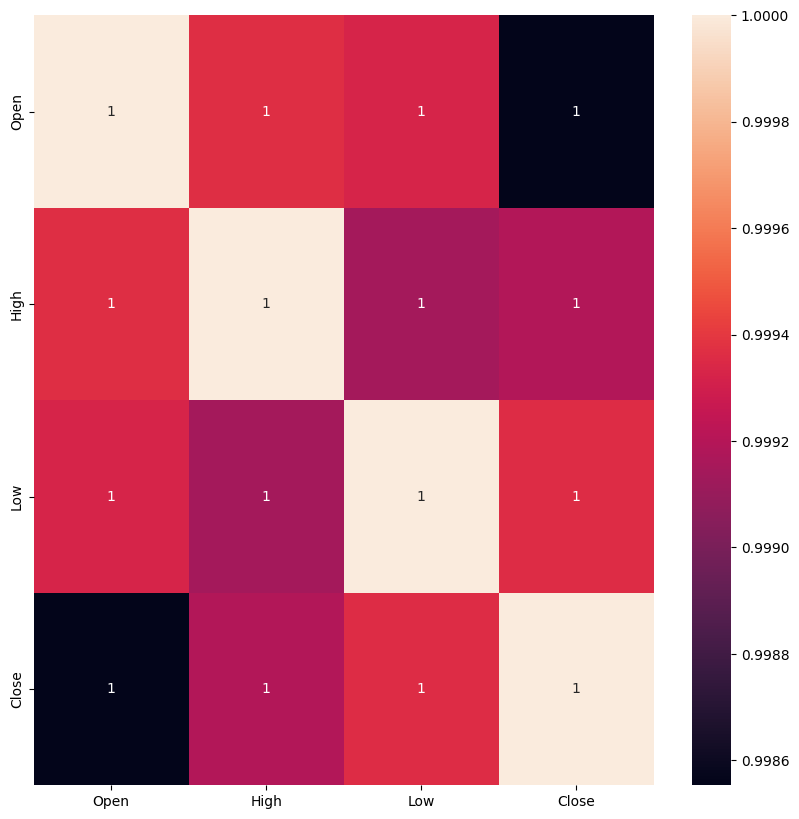

In [7]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)

In [8]:
df['H-L'] = df.High - df.Low
df['C_O'] = df.Close - df.Open
df['SMA7'] = df['Close'].rolling(7).mean()
df['SMA14'] = df['Close'].rolling(14).mean()
df['SMA21'] = df['Close'].rolling(21).mean()
df['STD7'] = df['Close'].rolling(7).std()
df

,Open,High,Low,Close,H-L,C_O,SMA7,SMA14,SMA21,STD7
J-Date,,,,,,,,,,
1398-06-24,6980,7220,6920,7220,300,240,NaN,NaN,NaN,NaN
1398-06-25,7301,7390,6940,6946,450,-355,NaN,NaN,NaN,NaN
1398-06-26,6934,7170,6812,6822,358,-112,NaN,NaN,NaN,NaN
1398-06-27,6700,6985,6598,6900,387,200,NaN,NaN,NaN,NaN
1398-06-30,6850,6986,6770,6861,216,11,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1402-06-18,3049,3049,2901,2923,148,-126,2905.571429,2746.428571,2697.571429,68.558630
1402-06-19,2897,2967,2867,2918,100,21,2917.428571,2773.785714,2706.761905,61.089708
1402-06-20,2930,3029,2907,2972,122,42,2933.142857,2806.571429,2719.333333,58.550345


In [9]:
df.dropna(inplace=True)
df.drop(['Open', 'High', 'Low'], axis='columns' , inplace=True)
df

,Close,H-L,C_O,SMA7,SMA14,SMA21,STD7
J-Date,,,,,,,
1398-07-21,7019,505,-401,7574.000000,7479.785714,7299.619048,336.979722
1398-07-22,6820,233,-180,7423.285714,7461.285714,7280.571429,408.297977
1398-07-23,6498,682,-392,7220.571429,7414.714286,7259.238095,469.927603
1398-07-24,6622,395,102,7039.714286,7367.000000,7249.714286,410.051507
1398-07-28,6267,526,-345,6861.000000,7303.214286,7219.571429,438.484511
...,...,...,...,...,...,...,...
1402-06-18,2923,148,-126,2905.571429,2746.428571,2697.571429,68.558630
1402-06-19,2918,100,21,2917.428571,2773.785714,2706.761905,61.089708
1402-06-20,2972,122,42,2933.142857,2806.571429,2719.333333,58.550345


In [10]:
df['target'] = df['Close'].shift(-1)
last_day = df.iloc[-1,:-1]
df.dropna(inplace=True)
df

,Close,H-L,C_O,SMA7,SMA14,SMA21,STD7,target
J-Date,,,,,,,,
1398-07-21,7019,505,-401,7574.000000,7479.785714,7299.619048,336.979722,6820.0
1398-07-22,6820,233,-180,7423.285714,7461.285714,7280.571429,408.297977,6498.0
1398-07-23,6498,682,-392,7220.571429,7414.714286,7259.238095,469.927603,6622.0
1398-07-24,6622,395,102,7039.714286,7367.000000,7249.714286,410.051507,6267.0
1398-07-28,6267,526,-345,6861.000000,7303.214286,7219.571429,438.484511,6612.0
...,...,...,...,...,...,...,...,...
1402-06-14,3025,107,50,2885.142857,2715.571429,2684.809524,82.406368,2923.0
1402-06-18,2923,148,-126,2905.571429,2746.428571,2697.571429,68.558630,2918.0
1402-06-19,2918,100,21,2917.428571,2773.785714,2706.761905,61.089708,2972.0


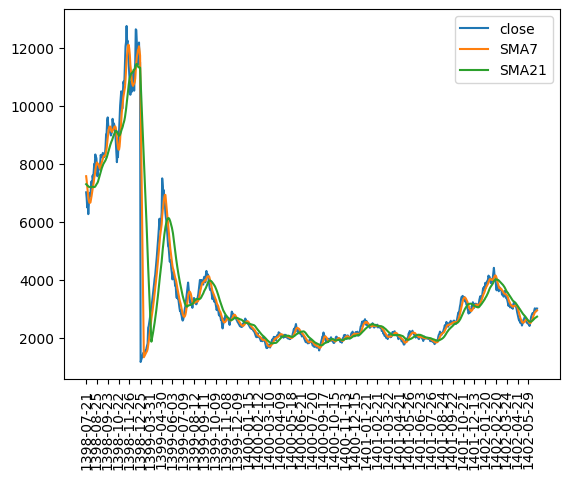

In [11]:
plt.plot(df.Close, label = 'close')
plt.plot(df.SMA7, label = 'SMA7')
plt.plot(df.SMA21, label = 'SMA21')
plt.xticks(range(0, len(df), 20), df.index[::20], rotation = 90)
plt.legend()
plt.show()

<Axes: >

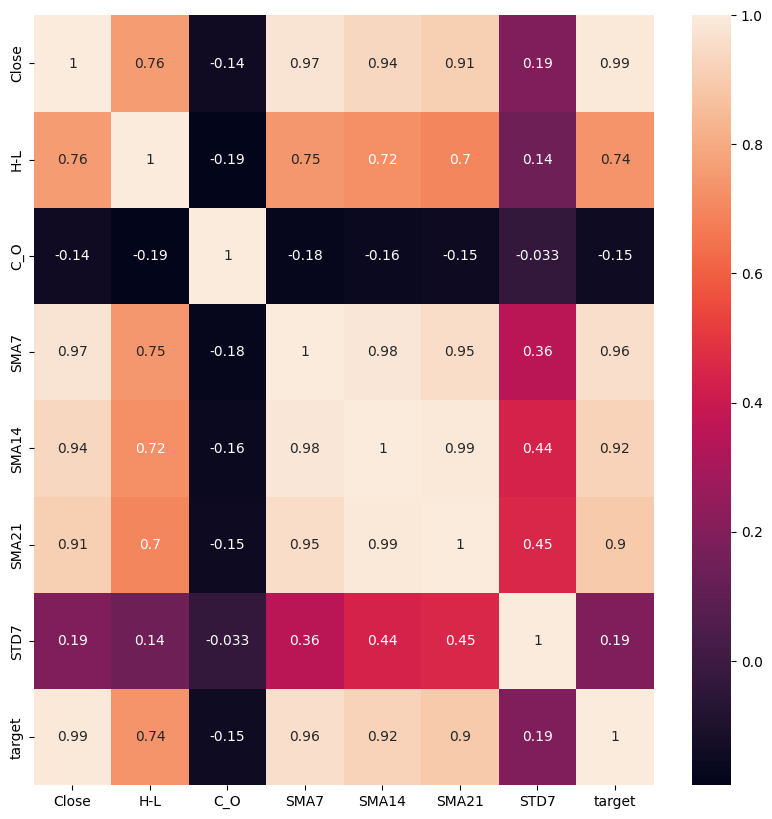

In [12]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot= True)

In [13]:
train_size = 0.8
x = df.iloc[:,:-1].values
y = df['target'].values
train_index = int(len(df) * train_size)
x_train , y_train = x[:train_index, :] , y[:train_index]
x_test , y_test = x[train_index:, :] , y[train_index:]

Prediction

In [14]:
from sklearn.metrics import (mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score)
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [15]:
y_pred = LR.predict(x_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print(f'MAPE: {round(mean_absolute_percentage_error(y_test, y_pred)*100,2)}%')
print('RMSE:', (mean_squared_error(y_test, y_pred)**0.5))
print('R2:', r2_score(y_test, y_pred))      

MAE: 78.89151304898789
MAPE: 2.47%
RMSE: 97.84516548191301
R2: 0.9602398181781602


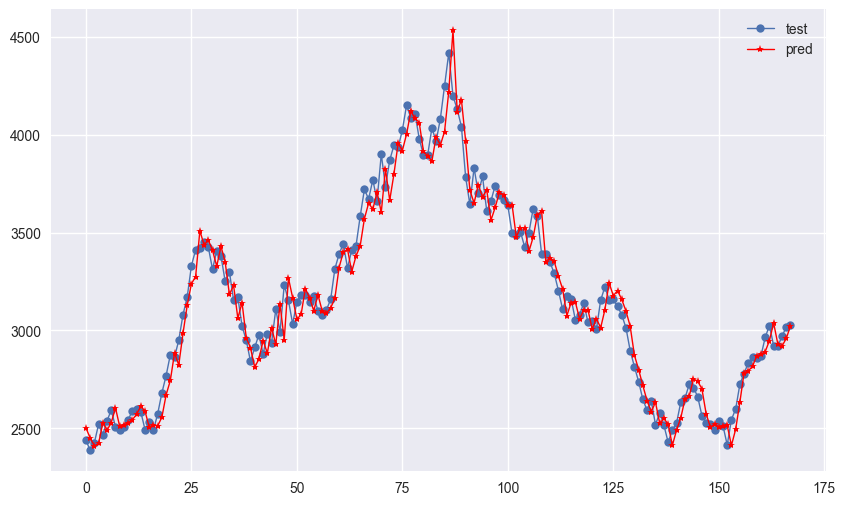

In [16]:
plt.style.use('seaborn')
plt.figure(figsize=(10, 6))
plt.plot(y_test, label = 'test', marker = 'o', markersize = 6, linewidth = 1)
plt.plot(y_pred, label = 'pred', marker = '*', markersize = 6, linewidth = 1, color = 'red')
plt.legend()
plt.show()

In [17]:
close_prices = df['Close'].tolist()
def calculate_ema(data, window):
    ema = []
    multiplier = 2 /(window + 1)
    ema.append(sum(data[:window]) / window)
    for i in range(window, len(data)):
        ema_value = (data[i] - ema[-1]) * multiplier + ema[-1]
        ema.append(ema_value)
    return ema
short_window = 5
long_window = 10

short_ema = calculate_ema(close_prices, short_window)
long_ema = calculate_ema(close_prices, long_window)

print("Short-Term EMA: ", short_ema)
print("Long_Term EMA :", long_ema)

Short-Term EMA:  [6645.2, 6634.133333333333, 6682.422222222222, 6788.281481481482, 6825.854320987654, 6963.9028806584365, 7109.268587105625, 7132.845724737083, 7287.563816491389, 7342.042544327593, 7474.361696218395, 7648.90779747893, 7749.2718649859535, 7940.514576657302, 8037.009717771535, 8091.33981184769, 8025.559874565127, 7873.706583043418, 7832.137722028945, 7854.425148019297, 7856.283432012865, 7839.188954675244, 7896.125969783496, 8032.7506465223305, 8098.167097681554, 8148.778065121036, 8196.185376747357, 8256.790251164904, 8245.193500776602, 8251.795667184402, 8247.863778122935, 8278.575852081956, 8389.050568054638, 8600.367045369758, 8753.578030246505, 9002.052020164336, 9201.36801344289, 9237.912008961926, 9237.94133930795, 9216.960892871966, 9177.97392858131, 9136.982619054206, 9083.321746036137, 9077.547830690759, 9078.031887127172, 9235.687924751448, 9280.125283167632, 9320.083522111754, 9334.055681407835, 9278.703787605224, 9219.135858403482, 9055.757238935656, 8824.83

In [18]:
def calculate_macd(df, Short_window=12, Long_window=26, signal_window=9):
    df['ShortEMA'] = df['Close'].ewm(span=Short_window, min_periods=1, adjust=False).mean()
    df['LongEMA'] = df['Close'].ewm(span=Long_window, min_periods=1, adjust=False).mean()
    df['MACD'] = df['ShortEMA'] - df['LongEMA']
    df['SignalLine'] = df['MACD'].ewm(span=signal_window, min_periods=1, adjust=False).mean()
def calculate_rsi(df, window=14):
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))
calculate_macd(df)
calculate_rsi(df)    
df

,Close,H-L,C_O,SMA7,SMA14,SMA21,STD7,target,ShortEMA,LongEMA,MACD,SignalLine,RSI
J-Date,,,,,,,,,,,,,
1398-07-21,7019,505,-401,7574.000000,7479.785714,7299.619048,336.979722,6820.0,7019.000000,7019.000000,0.000000,0.000000,NaN
1398-07-22,6820,233,-180,7423.285714,7461.285714,7280.571429,408.297977,6498.0,6988.384615,7004.259259,-15.874644,-3.174929,0.000000
1398-07-23,6498,682,-392,7220.571429,7414.714286,7259.238095,469.927603,6622.0,6912.940828,6966.758573,-53.817745,-13.303492,0.000000
1398-07-24,6622,395,102,7039.714286,7367.000000,7249.714286,410.051507,6267.0,6868.180701,6941.220901,-73.040200,-25.250834,19.224806
1398-07-28,6267,526,-345,6861.000000,7303.214286,7219.571429,438.484511,6612.0,6775.691362,6891.278612,-115.587250,-43.318117,12.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402-06-14,3025,107,50,2885.142857,2715.571429,2684.809524,82.406368,2923.0,2807.541799,2760.101386,47.440413,-15.884492,81.288724
1402-06-18,2923,148,-126,2905.571429,2746.428571,2697.571429,68.558630,2918.0,2825.304599,2772.167950,53.136649,-2.080264,74.545455
1402-06-19,2918,100,21,2917.428571,2773.785714,2706.761905,61.089708,2972.0,2839.565430,2782.970324,56.595106,9.654810,72.770511


In [19]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
mlp.fit(x_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)

In [20]:
y_predict = mlp.predict(x_test)
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print('RMSE:', (mean_squared_error(y_test, y_predict)**0.5))

Mean Squared Error: 9528.092508360283
RMSE: 97.61194859421813


In [21]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, eta0= 0.1, penalty=None, tol=1e-3)
sgd_reg.fit(x_train, y_train)

SGDRegressor(eta0=0.1, penalty=None)

In [22]:
y_pred = sgd_reg.predict(x_test)
print('score train =', sgd_reg.score(x_train, y_train))
print('score test =', sgd_reg.score(x_test, y_test))

score train = -2.9915194132311253e+28
score test = -4.6168038056951994e+29


In [23]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(x_train, y_train)
print('score train =', LR.score(x_train, y_train))
print('score test =', LR.score(x_test, y_test))
y_pred = LR.predict(x_test)

score train = 0.9753165511724926
score test = 0.9602398181781602


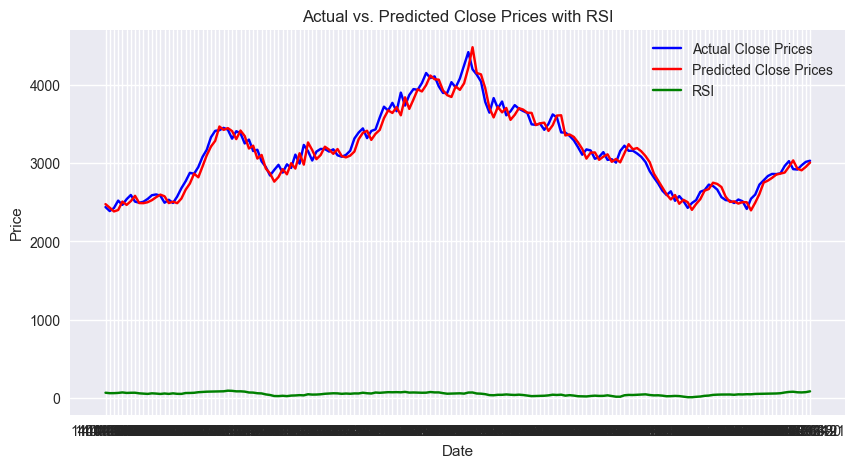

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual Close Prices', color = 'blue')
plt.plot(df.index[-len(y_predict):], y_predict, label = 'Predicted Close Prices', color = 'red')
plt.plot(df.index[-len(y_test):], df['RSI'][-len(y_test):], label = 'RSI', color = 'green')
plt.title('Actual vs. Predicted Close Prices with RSI')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


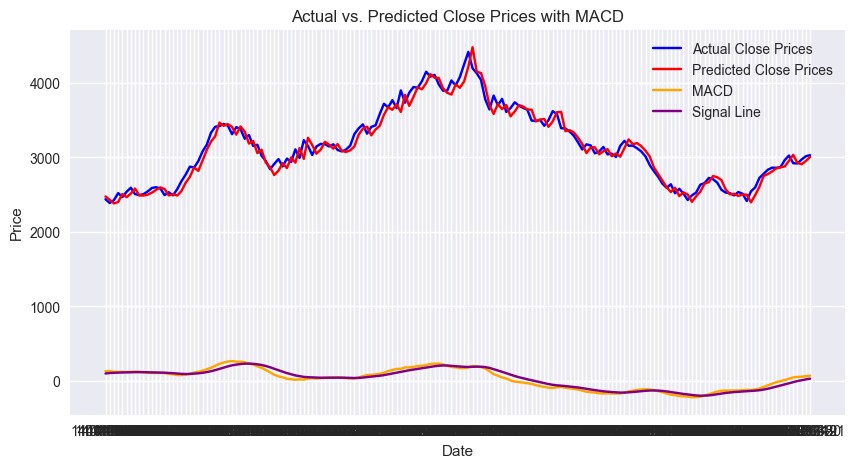

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual Close Prices', color = 'blue')
plt.plot(df.index[-len(y_predict):], y_predict, label = 'Predicted Close Prices', color = 'red')
plt.plot(df.index[-len(y_test):], df['MACD'][-len(y_test):], label = 'MACD', color = 'orange')
plt.plot(df.index[-len(y_test):], df['SignalLine'][-len(y_test):], label = 'Signal Line', color='purple')
plt.title('Actual vs. Predicted Close Prices with MACD')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [26]:
df['MA15'] = df['Close'].rolling(15).mean()
def calculate_trend(df, window=5):
    df['MA15_Diff'] = df['MA15'].diff(periods=window-1)
    df['Trend'] = 'None'
    df.loc[df['MA15_Diff'] > 0, 'Trend'] = 'Uptrend'
    df.loc[df['MA15_Diff'] < 0, 'Trend'] = 'Downtrend'
calculate_trend(df)
df.drop(['MA15_Diff', 'MA15', 'ShortEMA', 'LongEMA'], axis='columns' , inplace=True)

In [27]:
df.dropna(inplace=True)
df

,Close,H-L,C_O,SMA7,SMA14,SMA21,STD7,target,MACD,SignalLine,RSI,Trend
J-Date,,,,,,,,,,,,
1398-07-22,6820,233,-180,7423.285714,7461.285714,7280.571429,408.297977,6498.0,-15.874644,-3.174929,0.000000,None
1398-07-23,6498,682,-392,7220.571429,7414.714286,7259.238095,469.927603,6622.0,-53.817745,-13.303492,0.000000,None
1398-07-24,6622,395,102,7039.714286,7367.000000,7249.714286,410.051507,6267.0,-73.040200,-25.250834,19.224806,None
1398-07-28,6267,526,-345,6861.000000,7303.214286,7219.571429,438.484511,6612.0,-115.587250,-43.318117,12.400000,None
1398-07-29,6612,472,312,6754.000000,7242.357143,7207.714286,384.159255,6779.0,-120.083232,-58.671140,34.869888,None
...,...,...,...,...,...,...,...,...,...,...,...,...
1402-06-14,3025,107,50,2885.142857,2715.571429,2684.809524,82.406368,2923.0,47.440413,-15.884492,81.288724,Uptrend
1402-06-18,2923,148,-126,2905.571429,2746.428571,2697.571429,68.558630,2918.0,53.136649,-2.080264,74.545455,Uptrend
1402-06-19,2918,100,21,2917.428571,2773.785714,2706.761905,61.089708,2972.0,56.595106,9.654810,72.770511,Uptrend


In [28]:
def generate_trading_signals(df, short_window=12, long_window=26, signal_window=9):
    df['Signal'] = 'Hold'
    df['Position'] = 0
    buy_condition = (df['MACD'] > df['SignalLine']) & (df['RSI'] < 30)
    df.loc[buy_condition, 'Signal'] = 'Buy'
    df.loc[buy_condition, 'Position'] = 1

    sell_condition = (df['MACD'] < df['SignalLine']) & (df['RSI'] > 70)
    df.loc[sell_condition, 'Signal'] = 'Sell'
    df.loc[sell_condition, 'Position'] = -1

    uptrend_condition = df['Trend'] == 'Uptrend'
    downtrend_condition = df['Trend'] == 'Downtrend'
    
    df.loc[uptrend_condition & (df['Signal'] == 'Buy'), 'Signal'] = 'Hold'
    df.loc[downtrend_condition & (df['Signal'] == 'Sell'), 'Signal'] = 'Hold'

generate_trading_signals(df)
df['Signal'].unique()

array(['Hold', 'Sell', 'Buy'], dtype=object)

IndexError: index 168 is out of bounds for axis 0 with size 168

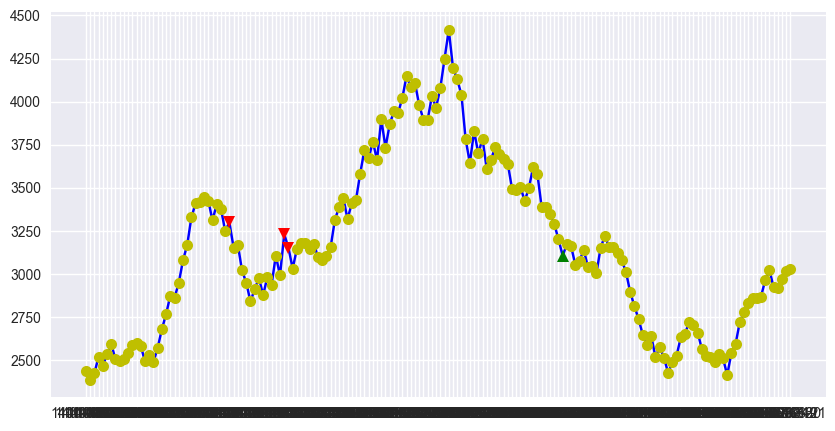

In [30]:
plt.figure(figsize=(10,5))
plt.plot(df.index[-len(y_test):], y_test, label = 'Actual Close Price', color = 'blue')
for i in range(len(df)):
    if df['Signal'].iloc[i] == 'Buy':
        plt.plot(i, y_test[i], 'g^', markersize=8, label='Buy Signal')
    elif df['Signal'].iloc[i] == 'Sell':
        plt.plot(i, y_test[i], 'rv', markersize=8, label='Sell Signall')
    elif df['Signal'].iloc[i] == 'Hold':
        plt.plot(i, y_test[i], 'yo', markersize=8, label='Hold Signal')
plt.title('Trading Signals on y_test')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()              